In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis
from icarogw.utils.quick_init import initialize_prior_dict

injections = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

# Read the posterior samples
posterior_dict = {}
base_dir = "/home/czc/projects/working/LIGO_posterior"

list_evO1O2 = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O1', 'O2'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO1O2.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-1/{event}_GWTC-1.hdf5"
    pos_samples = posterior_samples(filename)
    posterior_dict[event] = pos_samples

list_evO3a = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3a'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3a.keys()):
    if event != 'GW190814':
        print(event)
        filename = f"{base_dir}/GWTC-2/{event}.h5"
        pos_samples = posterior_samples(filename)
        posterior_dict[event] = pos_samples

list_evO3b = icarogw.utils.quick_init.initialize_events_dict(
    runs=['O3b'], type=['BBH', 'SPECIAL'], snr_cut=11)
for event in list(list_evO3b.keys()):
    print(event)
    filename = f"{base_dir}/GWTC-3/IGWN-GWTC3p0-v1-{event}_PEDataRelease_mixed_nocosmo.h5"
    pos_samples = posterior_samples(filename, waveform='C01:Mixed')
    posterior_dict[event] = pos_samples

print(f"Using {len(posterior_dict)} events.")


GW150914
Using Overall_posterior posterior with a total of 8350 samples
GW151226
Using Overall_posterior posterior with a total of 52252 samples
GW170104
Using Overall_posterior posterior with a total of 24972 samples
GW170608
Using Overall_posterior posterior with a total of 6448 samples
GW170809
Using Overall_posterior posterior with a total of 14802 samples
GW170814
Using Overall_posterior posterior with a total of 40000 samples
GW170818
Using Overall_posterior posterior with a total of 5862 samples
GW170823
Using Overall_posterior posterior with a total of 4278 samples
GW190408_181802
Using PublicationSamples posterior with a total of 37366 samples
GW190412
Using PublicationSamples posterior with a total of 23984 samples
GW190503_185404
Using PublicationSamples posterior with a total of 37669 samples
GW190512_180714
Using PublicationSamples posterior with a total of 37247 samples
GW190513_205428
Using PublicationSamples posterior with a total of 39072 samples
GW190517_055101
Using 

In [2]:
# injs = np.zeros((len(injections.dl_original), 6))

# injs[:, 0] = injections.m1d_original
# injs[:, 1] = injections.m2d_original
# injs[:, 2] = injections.dl_original*1e-3 # convert to Gpc
# injs[:, 3] = injections.ini_prior_original
# injs[:, 4] = injections.ifar
# injs[:, 5] = injections.snr_original
# np.savetxt("/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.txt", injs)

In [3]:
mass_model = 'BBH-powerlaw'
cosmology_model = 'flatLCDM'
redshift_model = 'powerlaw'
outdir = f'H0_GWTC-3_{mass_model}_{cosmology_model}_{redshift_model}_3/'
injections.update_cut(snr_cut=11, ifar_cut=0) # We are going to update the injections with the new SNR cut to 12

Selecting injections with SNR 11.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
prior_dict = initialize_prior_dict(mass_model, cosmology_model, redshift_model, False)

# prior_dict['H0'] = 100.61
# prior_dict['Om0'] = 0.54
# prior_dict['σc'] = 0.5

# prior_dict["kappa"] = bilby.core.prior.Uniform(-6, 6, name='kappa')
# prior_dict["mmax"] = bilby.core.prior.Uniform(-6, 6, name='kappa')

prior_dict


{'gamma': Uniform(minimum=-4, maximum=10, name='gamma', latex_label='gamma', unit=None, boundary=None),
 'R0': Uniform(minimum=0, maximum=200, name='$R_0$', latex_label='$R_0$', unit=None, boundary=None),
 'alpha': Uniform(minimum=1.5, maximum=12, name='alpha', latex_label='alpha', unit=None, boundary=None),
 'beta': Uniform(minimum=-4, maximum=12, name='beta', latex_label='beta', unit=None, boundary=None),
 'mmin': Uniform(minimum=2, maximum=10, name='mmin', latex_label='mmin', unit=None, boundary=None),
 'mmax': Uniform(minimum=50, maximum=200, name='mmax', latex_label='mmax', unit=None, boundary=None),
 'H0': Uniform(minimum=10, maximum=200, name='$H_0$', latex_label='$H_0$', unit=None, boundary=None),
 'Om0': Uniform(minimum=0.0, maximum=1.0, name='$\\Omega_m$', latex_label='$\\Omega_m$', unit=None, boundary=None)}

10:51 bilby INFO    : Running for label 'dynesty', output will be saved to 'H0_GWTC-3_BBH-powerlaw_flatLCDM_powerlaw_3/'
10:51 bilby INFO    : Search parameters:
10:51 bilby INFO    :   gamma = Uniform(minimum=-4, maximum=10, name='gamma', latex_label='gamma', unit=None, boundary=None)
10:51 bilby INFO    :   R0 = Uniform(minimum=0, maximum=200, name='$R_0$', latex_label='$R_0$', unit=None, boundary=None)
10:51 bilby INFO    :   alpha = Uniform(minimum=1.5, maximum=12, name='alpha', latex_label='alpha', unit=None, boundary=None)
10:51 bilby INFO    :   beta = Uniform(minimum=-4, maximum=12, name='beta', latex_label='beta', unit=None, boundary=None)
10:51 bilby INFO    :   mmin = Uniform(minimum=2, maximum=10, name='mmin', latex_label='mmin', unit=None, boundary=None)
10:51 bilby INFO    :   mmax = Uniform(minimum=50, maximum=200, name='mmax', latex_label='mmax', unit=None, boundary=None)
10:51 bilby INFO    :   H0 = Uniform(minimum=10, maximum=200, name='$H_0$', latex_label='$H_0$', un

Using the parallel mode with 2000 samples


/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/cosmologies.py:112: RuntimeWarning: divide by zero encountered in log10
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/redshift.py:95: RuntimeWarning: divide by zero encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/priors/custom_math_priors.py:301: RuntimeWarning: invalid value encountered in log
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/icarogw-1.0.5-py3.9.egg/icarogw/analyses/cosmo_pop_rate_marginalized.py:211: RuntimeWarning: invalid value encountered in subtract
10:51 bilby INFO    : Single likelihood evaluation took 4.796e-02 s


0it [00:00, ?it/s]

10:51 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 32, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f70d2060b20>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
10:51 bilby INFO    : Checkpoint every check_point_delta_t = 600s
10:51 bilby INFO    : Using dynesty version 1.0.1
10:51 bilby INFO    : Using the bilby-implemented rwalk samp

3408it [14:29,  4.18it/s, bound:292 nc: 34 ncall:9.4e+04 eff:3.6% logz=-1042.84+/-0.15 dlogz:6.843>0.1] 

11:06 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-powerlaw_flatLCDM_powerlaw_3//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6049it [24:36,  4.45it/s, bound:588 nc: 34 ncall:1.9e+05 eff:3.2% logz=-1039.73+/-0.18 dlogz:0.799>0.1]

11:16 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-powerlaw_flatLCDM_powerlaw_3//dynesty_resume.pickle
11:16 bilby INFO    : Writing 558 current samples to H0_GWTC-3_BBH-powerlaw_flatLCDM_powerlaw_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


7239it [28:14,  6.65it/s, bound:724 nc: 23 ncall:2.3e+05 eff:3.1% logz=-1039.54+/-0.18 dlogz:0.105>0.1]

11:19 bilby INFO    : Written checkpoint file H0_GWTC-3_BBH-powerlaw_flatLCDM_powerlaw_3//dynesty_resume.pickle
11:19 bilby INFO    : Writing 2603 current samples to H0_GWTC-3_BBH-powerlaw_flatLCDM_powerlaw_3//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
11:19 bilby INFO    : Starting to close worker pool.
11:19 bilby INFO    : Finished closing worker pool.


7264it [28:17,  4.28it/s, bound:726 nc:  1 ncall:2.3e+05 eff:3.3% logz=-1039.49+/-0.19 dlogz:0.000>0.1]



11:20 bilby INFO    : Sampling time: 0:23:47.787257
11:20 bilby INFO    : Summary of results:
nsamples: 7764
ln_noise_evidence:    nan
ln_evidence: -1039.492 +/-  0.192
ln_bayes_factor:    nan +/-  0.192



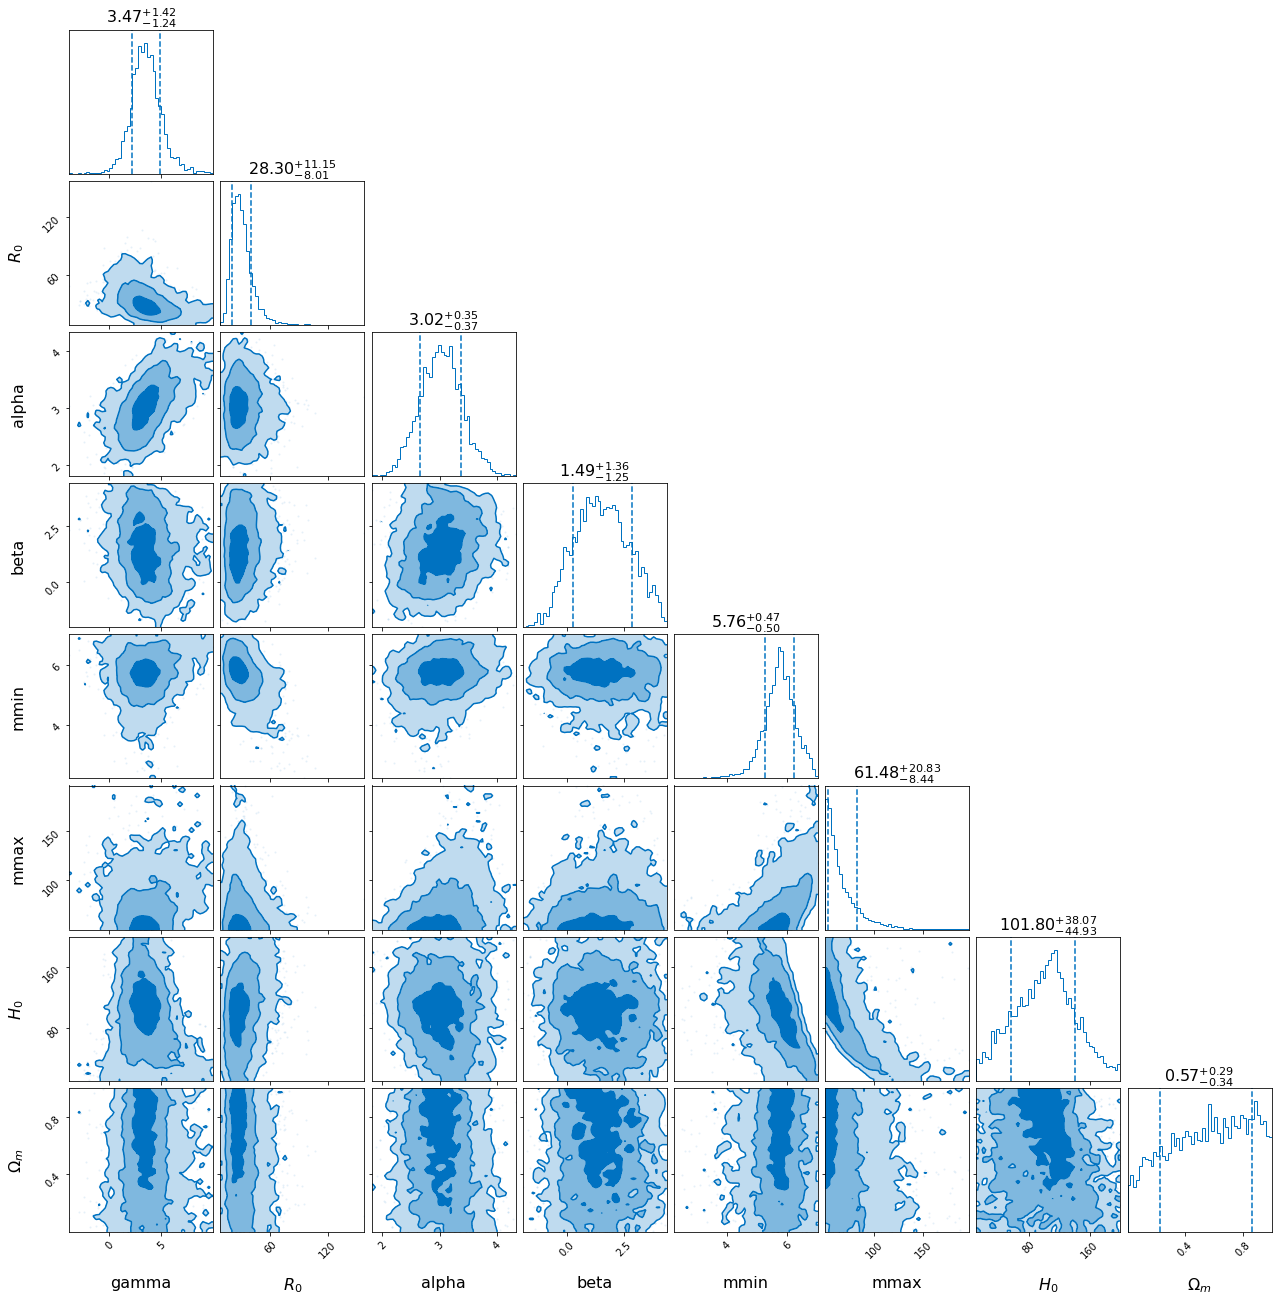

In [5]:
analysis = hierarchical_analysis(posterior_dict, injections, scale_free=False)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(mass_model, cosmology_model, redshift_model, prior_dict, nlive=500, nact=2, walks=20, outdir=outdir, label='dynesty', npool=32, parallel=2000)
result.plot_corner()